# Neural Networks
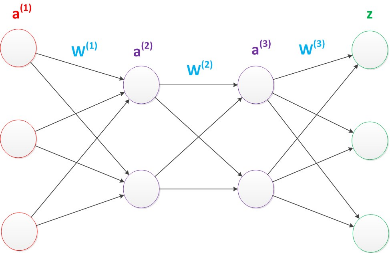

多层神经网络中，输出也是按照一层一层的方式来计算。从最外面的层开始，算出所有单元的值以后，再继续计算更深一层。只有当前层所有单元的值都计算完毕以后，才会算下一层。有点像计算向前不断推进的感觉。所以这个过程叫做“正向传播”。

神经网络中，会进行多层运算，比如激活、卷积、最大池化等等。PyTorch 中的神经网络，定义了网络的结构，能够进行前向传播和反向传播，网络对象继承了 PyTorch 框架的 nn.Module 类，用于创建神经网络。

## 1. 网络搭建


网络搭建需要定义网络模型，并且定义前向传播函数。

In [ ]:
# 网络搭建
class TestModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(3, 32, 5, padding=2)),
            ('maxpool1', nn.MaxPool2d(2)),
            ('conv2', nn.Conv2d(32, 32, 5, padding=2)),
            ('maxpool2', nn.MaxPool2d(2)),
            ('conv3', nn.Conv2d(32, 64, 5, padding=2)),
            ('maxpool3', nn.MaxPool2d(2)),
            ('flatten', nn.Flatten()),
            ('linear1', nn.Linear(1024, 64)),
            ('linear2', nn.Linear(64, 10))
        ]))

    def forward(self, input_data):
        return self.model(input_data)

## 2. 损失函数 & 反向传播
损失函数不难理解，损失函数是表示神经网络性能“好坏程度”的指标。神经网络以某个指标为线索寻找最优的权重参数，这个指标就是损失函数。可以做损失函数的函数有很多，我们一般使用均方误差和交叉熵误差函数。[Loss Function](https://pytorch.org/docs/stable/nn.html#loss-functions)

以均方差为例：

In [1]:
import torch
from torch.nn import L1Loss, MSELoss

inputs = torch.tensor([1,2,3],dtype=torch.float32) # 实际值
targets = torch.tensor([1,2,5],dtype=torch.float32) # 目标值
loss_mse = MSELoss()

result = loss_mse(inputs,targets)
print(result)

tensor(1.3333)


这里利用loss来调整参数，主要使用的方法是梯度下降法。

这个方法原理其实还是有点复杂的，但是pytorch为我们实现好了，所以用起来很简单。

调用损失函数得到的值的backward函数即可。

In [ ]:
loss = CrossEntropyLoss() # 定义loss函数
# 实例化这个网络
test = Network()
for data in dataloader:
    imgs,targets = data
    outputs = test(imgs) # 输入图片
    result_loss = loss(outputs,targets)
    result_loss.backward() # 反向传播
    print('ok')

## 3. 优化器
优化器也有好几种，官网对优化器的介绍：[optim](https://pytorch.org/docs/stable/optim.html)

不同的优化器需要设置的参数不同，但是有两个是大部分都有的：模型参数与学习速率。

我们以SDG优化器为例，看下用法：

In [ ]:
# 实例化这个网络
test = Network()
loss = CrossEntropyLoss() # 定义loss函数
# 构造优化器
# 这里我们选择的优化器是SGD 传入两个参数 第一个是个模型test的参数 第二个是学习率
optim = torch.optim.SGD(test.parameters(),lr=0.01)

for data in dataloader:
    imgs,targets = data
    outputs = test(imgs) # 输入图片
    result_loss = loss(outputs,targets) # 计算loss
    optim.zero_grad() #因为这是在循环里面 所以每次开始优化之前要把梯度置为0 防止上一次的结果影响这一次
    result_loss.backward() # 反向传播 求得梯度
    optim.step() # 对参数进行调优